In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
syn = pd.read_csv('data_total_measure.csv')

In [4]:
pd.set_option('display.max_columns', 1890)
syn.describe()

Duration    Insured.age    Insured.sex        Car.age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      314.204060      51.378950       0.539430       5.639720   
std        79.746222      15.467075       0.498445       4.062135   
min        27.000000      16.000000       0.000000      -2.000000   
25%       200.000000      39.000000       0.000000       2.000000   
50%       365.000000      51.000000       1.000000       5.000000   
75%       366.000000      63.000000       1.000000       8.000000   
max       366.000000     103.000000       1.000000      20.000000   

             Marital  Car.use_Commercial  Car.use_Commute  Car.use_Farmer  \
count  100000.000000       100000.000000    100000.000000   100000.000000   
mean        0.300700            0.026430         0.498150        0.014130   
std         0.458565            0.160411         0.499999        0.118027   
min         0.000000            0.000000         0.000000        0.000000   
25%         0.000000            0.000000         0.000000        0.000000   
50%         0.000000            0.000000         0.000000        0.000000   
75%         1.000000            0.000000         1.000000        0.000000   
max         1.000000            1.000000         1.000000        1.000000   

       Car.use_Private   Credit.score         Region  Annual.miles.drive  \
count    100000.000000  100000.000000  100000.000000       100000.000000   
mean          0.461290     800.888870       0.781410         9124.122908   
std           0.498502      83.382316       0.413292         3826.144730   
min           0.000000     422.000000       0.000000            0.000000   
25%           0.000000     766.000000       1.000000         6213.710000   
50%           0.000000     825.000000       1.000000         7456.452000   
75%           1.000000     856.000000       1.000000        12427.420000   
max           1.000000     900.000000       1.000000        56731.172300   

       Years.noclaims      Territory  Annual.pct.driven  Total.miles.driven  \
count   100000.000000  100000.000000      100000.000000       100000.000000   
mean        28.839960      56.531390           0.502798         4833.575303   
std         16.123717      24.036518           0.300049         4545.943016   
min          0.000000      11.000000           0.002740            0.095298   
25%         15.000000      35.000000           0.249315         1529.897500   
50%         29.000000      62.000000           0.490411         3468.287765   
75%         41.000000      78.000000           0.753425         6779.876842   
max         79.000000      91.000000           1.079452        47282.603936   

       Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.139365       0.151262       0.148288       0.153009   
std         0.042807       0.047612       0.044609       0.044418   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.120894       0.130084       0.129348       0.133619   
50%         0.137909       0.147900       0.147083       0.151377   
75%         0.155203       0.168479       0.165925       0.170582   
max         0.998172       1.000000       1.000000       0.997900   

       Pct.drive.fir  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  \
count  100000.000000  100000.000000   1.000000e+05   100000.000000   
mean        0.157641       0.137912   1.125241e-01        0.003931   
std         0.043716       0.053069   4.986396e-02        0.008122   
min         0.000000       0.000000  -1.880000e-09        0.000000   
25%         0.138615       0.109415   8.525815e-02        0.000000   
50%         0.155996       0.134668   1.107058e-01        0.001308   
75%         0.174473       0.161304   1.347562e-01        0.004791   
max         0.998617       0.946596   9.760634e-01        0.455742   

       Pct.drive.3hrs  Pct.drive.4hrs  Pct.dri

In [3]:
syn2=pd.read_csv('data_total_measure.csv')

In [4]:
syn2['Duration']=pd.cut(syn['Duration'],bins=[0, 197, 230, 264,298,332,366])

In [5]:
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Duration'],aggfunc=np.mean)

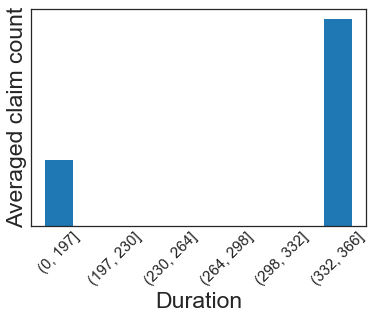

In [6]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Duration',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_du.pdf',bbox_inches = "tight")
plt.show()

In [7]:
syn2['Annual.pct.driven']=pd.cut(syn['Annual.pct.driven'],bins=[0,0.15,0.30,0.45,0.60,0.75,0.90,1.079])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Annual.pct.driven'],aggfunc=np.mean)
table

NB_Claim
Annual.pct.driven          
(0.0, 0.15]        0.006750
(0.15, 0.3]        0.017428
(0.3, 0.45]        0.025593
(0.45, 0.6]        0.029966
(0.6, 0.75]        0.075026
(0.75, 0.9]        0.112041
(0.9, 1.079]       0.105105

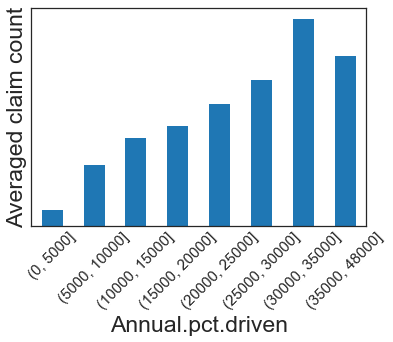

In [14]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Annual.pct.driven',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_pdriven.pdf',bbox_inches = "tight")
plt.show()

In [15]:
syn2['Total.miles.driven']=pd.cut(syn['Total.miles.driven'],bins=[0,5000,10000,15000,20000,25000,30000,35000,48000])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Total.miles.driven'],aggfunc=np.mean)
table

NB_Claim
Total.miles.driven          
(0, 5000]           0.019860
(5000, 10000]       0.077974
(10000, 15000]      0.112420
(15000, 20000]      0.127758
(20000, 25000]      0.155477
(25000, 30000]      0.186047
(30000, 35000]      0.265306
(35000, 48000]      0.217391

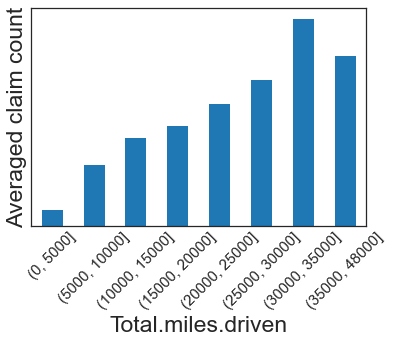

In [16]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Total.miles.driven',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_mdriven.pdf',bbox_inches = "tight")
plt.show()

In [17]:
syn2['Pct.drive.tue']=pd.cut(syn['Pct.drive.tue'],bins=[0,0.1,0.2,0.3,0.4,0.5,1])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Pct.drive.tue'],aggfunc=np.mean)
table

NB_Claim
Pct.drive.tue          
(0.0, 0.1]     0.019477
(0.1, 0.2]     0.052021
(0.2, 0.3]     0.021148
(0.3, 0.4]     0.012987
(0.4, 0.5]     0.014925
(0.5, 1.0]     0.000000

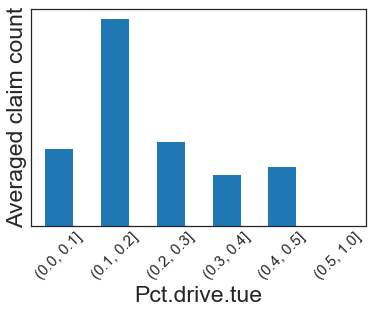

In [18]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Pct.drive.tue',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_tue.pdf',bbox_inches = "tight")
plt.show()

In [19]:
syn2['Pct.drive.rush pm']=pd.cut(syn['Pct.drive.rush pm'],bins=[0,0.1,0.2,0.3,0.4,0.5,1])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Pct.drive.rush pm'],aggfunc=np.mean)
table

NB_Claim
Pct.drive.rush pm          
(0.0, 0.1]         0.033301
(0.1, 0.2]         0.056676
(0.2, 0.3]         0.047519
(0.3, 0.4]         0.046536
(0.4, 0.5]         0.040816
(0.5, 1.0]         0.000000

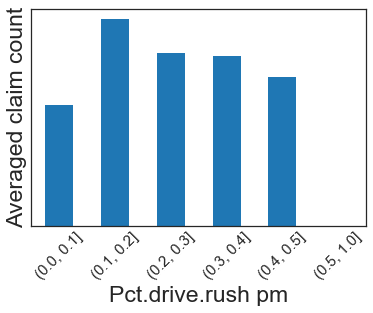

In [20]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Pct.drive.rush pm',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_rushpm.pdf',bbox_inches = "tight")
plt.show()

In [21]:
syn2['Accel.09miles']=pd.cut(syn['Accel.09miles'],bins=[0,15,30,45,60,75,621])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Accel.09miles'],aggfunc=np.mean)
table

NB_Claim
Accel.09miles          
(0, 15]        0.059268
(15, 30]       0.048122
(30, 45]       0.073248
(45, 60]       0.075862
(60, 75]       0.000000
(75, 621]      0.026178

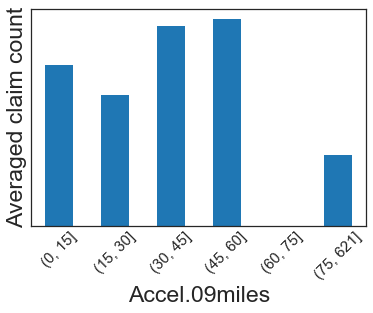

In [22]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Accel.09miles',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_A09.pdf',bbox_inches = "tight")
plt.show()

In [23]:
syn2['Brake.09miles']=pd.cut(syn['Brake.09miles'],bins=[0,15,30,45,60,75,621])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Brake.09miles'],aggfunc=np.mean)
table

NB_Claim
Brake.09miles          
(0, 15]        0.050589
(15, 30]       0.090909
(30, 45]       0.149020
(45, 60]       0.090909
(60, 75]       0.094340
(75, 621]      0.024590

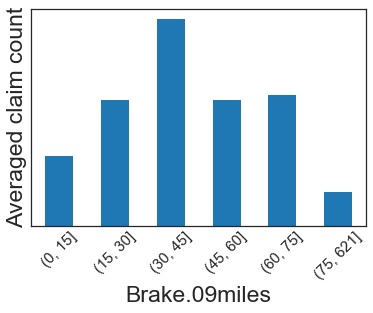

In [24]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Brake.09miles',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_B09.pdf',bbox_inches = "tight")
plt.show()

In [25]:
syn2['Insured.age']=pd.cut(syn['Insured.age'],bins=[15,25,35,45,55,65,75,85,103])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Insured.age'],aggfunc=np.mean)
table

NB_Claim
Insured.age          
(15, 25]     0.074653
(25, 35]     0.061082
(35, 45]     0.053188
(45, 55]     0.050622
(55, 65]     0.038005
(65, 75]     0.029258
(75, 85]     0.022139
(85, 103]    0.014545

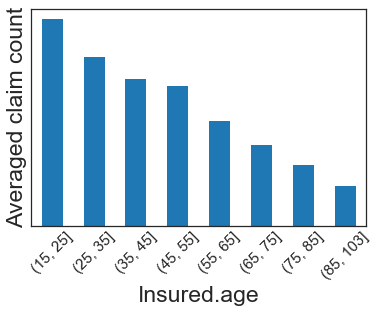

In [26]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Insured.age',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_Page.pdf',bbox_inches = "tight")
plt.show()

In [27]:
syn2['Credit.score']=pd.cut(syn['Credit.score'],bins=[420,520,620,720,820,900])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Credit.score'],aggfunc=np.mean)
table

NB_Claim
Credit.score          
(420, 520]    0.070716
(520, 620]    0.080947
(620, 720]    0.070102
(720, 820]    0.054206
(820, 900]    0.032822

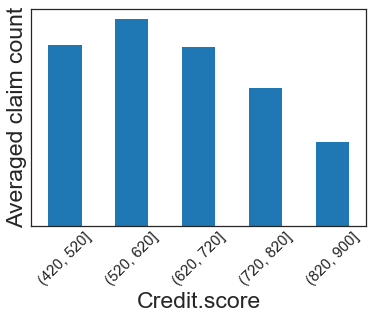

In [28]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Credit.score',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_credit.pdf',bbox_inches = "tight")
plt.show()

In [29]:
syn2['Years.noclaims']=pd.cut(syn['Years.noclaims'],bins=[0,9,18,27,36,45,54,63,72,79])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Years.noclaims'],aggfunc=np.mean)
table

NB_Claim
Years.noclaims          
(0, 9]          0.070975
(9, 18]         0.052389
(18, 27]        0.050891
(27, 36]        0.042851
(36, 45]        0.034574
(45, 54]        0.030227
(54, 63]        0.018032
(63, 72]        0.019504
(72, 79]        0.065574

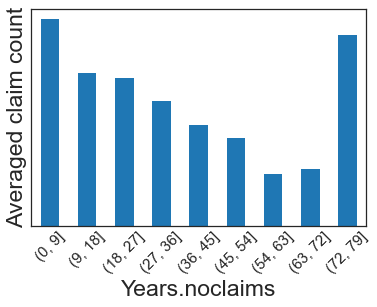

In [30]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Years.noclaims',fontsize=23)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('re_hist_nclaim.pdf',bbox_inches = "tight")
plt.show()

In [38]:
syn2['Territory']=pd.cut(syn['Territory'],bins=10)
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Territory'],aggfunc=np.mean)
table

NB_Claim
Territory              
(10.92, 19.0]  0.044536
(19.0, 27.0]   0.043044
(27.0, 35.0]   0.043882
(35.0, 43.0]   0.042195
(51.0, 59.0]   0.051108
(59.0, 67.0]   0.046917
(67.0, 75.0]   0.055288
(75.0, 83.0]   0.046764
(83.0, 91.0]   0.035694

In [39]:
table = pd.pivot_table(syn, values=['NB_Claim'], index=['Territory'],aggfunc=np.mean)
table

NB_Claim
Territory          
11         0.000000
12         0.033179
13         0.050117
14         0.043373
15         0.046154
18         0.047601
23         0.037834
24         0.037534
26         0.055186
30         0.042342
31         0.040582
32         0.051149
33         0.049657
35         0.039341
36         0.044343
37         0.039216
38         0.036280
39         0.045849
43         0.043467
52         0.041843
54         0.062128
57         0.059477
59         0.048656
60         0.053698
61         0.050847
62         0.046422
63         0.046886
64         0.048313
65         0.039394
66         0.049153
67         0.042785
68         0.055370
69         0.058348
70         0.051920
71         0.065927
72         0.058170
73         0.054054
74         0.050388
75         0.049625
76         0.058675
77         0.055395
78         0.042735
79         0.041268
80         0.040532
81         0.037879
82         0.042139
83         0.050351
84         0.036050
85         0.031630
86         0.038932
87         0.037099
88         0.041020
89         0.029118
90         0.031893
91         0.043520

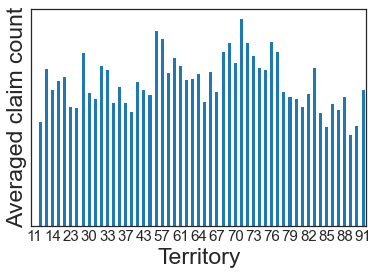

In [41]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=23)
plt.xlabel('Territory',fontsize=23)
plt.xticks(rotation='horizontal',fontsize=15)
x=[11,14,23,30,33,37,43,57,61,64,67,70,73, 76,79,82,85,88,91]
N = len(x)
x2 = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54]
plt.xticks(x2, x)

plt.savefig('re_hist_terr.pdf',bbox_inches = "tight")
plt.show()

In [ ]:
syn2['Credit.score']=pd.cut(syn['Credit.score'],bins=[420,520,620,720,820,900])
table = pd.pivot_table(syn2, values=['NB_Claim'], index=['Credit.score'],aggfunc=np.mean)
table

In [ ]:
plt.style.use('seaborn-white')
table.plot(kind='bar',legend=None)
plt.yticks([], [])
plt.ylabel('Averaged claim count',fontsize=20)
plt.xlabel('Annual.pct.driven',fontsize=20)
plt.xticks(rotation='horizontal')
plt.savefig('hist_pdriven.pdf',bbox_inches = "tight")
plt.show()